## Bibliotecas

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential

## Carregamento dos dados

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Tratamento dos dados

In [70]:
# Normalização dos pixels para o intervalo [0, 1]
max_val = X_train.max()
print(max_val)
X_train = X_train / max_val
X_test = X_test / max_val

# Transforma as imagens em vetores unidimensionais de 784 px (28 x 28)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

255


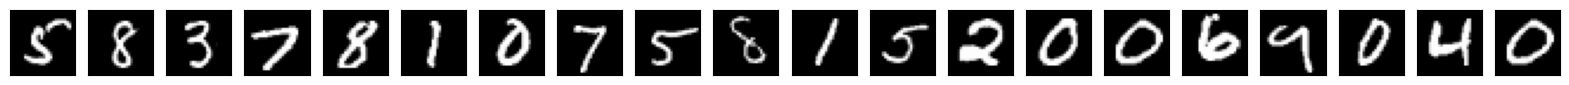

In [71]:
# Visualiza algumas amostras
n = 20
indexes = np.random.choice(len(X_train), n)
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [82]:
# Aplica ruído nos dados e armazena em variáveis acessórias
factor = .5
X_train_noisy = X_train + factor * np.random.normal(loc=0.0, scale=1.,
                                                    size=X_train.shape)
X_test_noisy = X_test + factor * np.random.normal(loc=0.0, scale=1.,
                                                  size=X_test.shape)

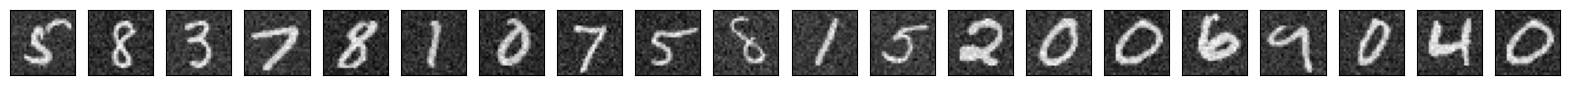

In [73]:
# Visualiza as amostras com ruído
n = 20
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train_noisy[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Construção do modelo autoencoder

In [74]:
# Define a dimensão da representação codificada
n_latent = 60
dim_input = X_train.shape[1]

# Cria o modelo do autoencoder
model = Sequential()
model.add(Dense(units=400, input_dim=dim_input, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=n_latent, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=dim_input, activation='sigmoid'))

# Compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

e:\workspace\ciencia-dados\autoencoders\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Treinamento com dados originais e validação com dados sem ruídos

In [75]:
# Treina o autoencoder
model.fit(X_train, X_train, epochs=30, batch_size=256, shuffle=True,
          validation_data=(X_test, X_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2863 - val_loss: 0.1261
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1196 - val_loss: 0.1016
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1006 - val_loss: 0.0937
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0937 - val_loss: 0.0901
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0895 - val_loss: 0.0872
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0868 - val_loss: 0.0844
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0847 - val_loss: 0.0830
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0828 - val_loss: 0.0819
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0816 - val_loss: 0.0816
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0806 - val_loss: 0.0797
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0794 - val_loss: 0.0787
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

In [76]:
# Codifica e decodifica as imagens de teste sem ruido
encoded_imgs = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Comparação dos dados originais e dos dados gerados - Sem ruído

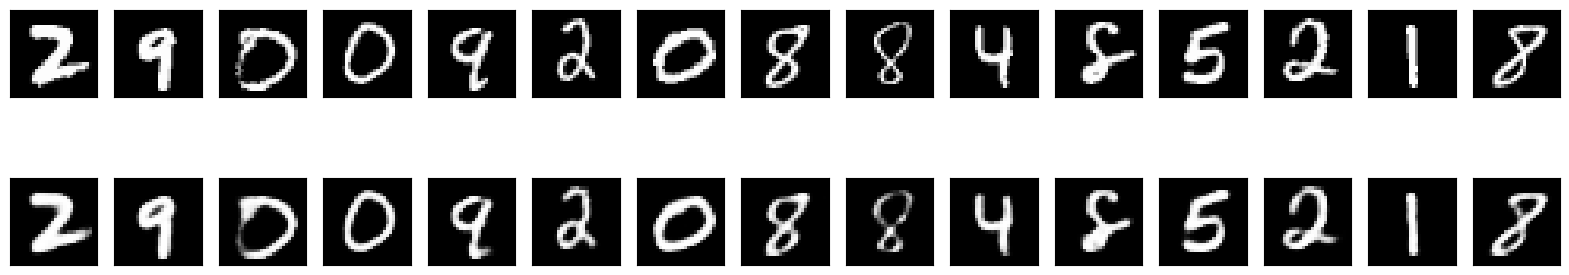

In [77]:
n = 15
indexes = np.random.choice(X_test.shape[0], n)
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Validação com dados com ruído usando o modelo treinado

In [78]:
# Codifica e decodifica as imagens de teste com ruído
endoded_imgs = model.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


## Comparação dos dados originais e dos dados gerados - Sem ruído

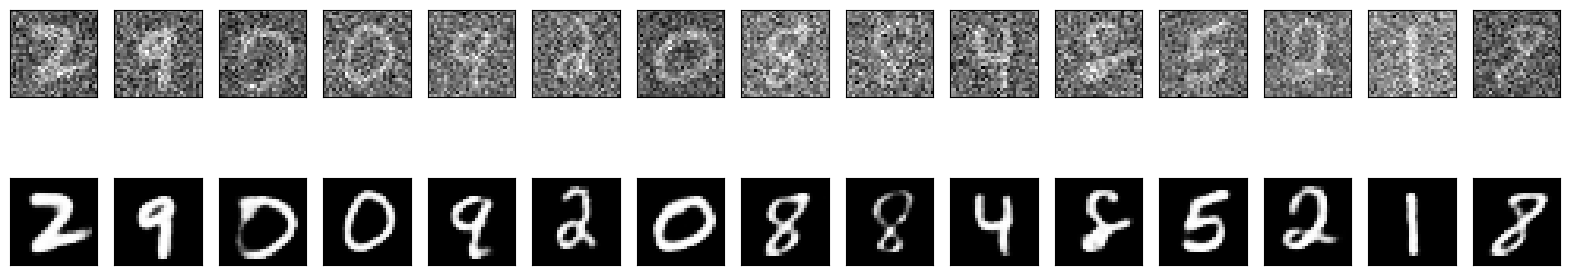

In [83]:
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Criação de modelo classificador para testar as amostrar ruidosas, amostras originais e amostras recuperadas com ruído